In [113]:
#1. import library
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [114]:
# 2. mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
# 3. load and read data
data = pd.read_csv('drive/MyDrive/Aplikasi Pembelajaran Mesin/Pertemuan 3/Dataset/breast-cancer.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [116]:
# 4. informasi dan deskripsi data

# ukuran data
print("Ukuran data adalah", data.shape)
print("")

# informasi data
data.info()

Ukuran data adalah (569, 33)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 

In [117]:
# 5. preprocessing data

# cek data null
print(data.isnull().sum())

# cek data duplikat
print(data.duplicated().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [118]:
# 5. preprocessing data

# menghapus cols unnamed:32 karena terlalu banyak data null
data = data.drop(["Unnamed: 32"], axis=1)

# menghapus cols id karena tidak diperlukan dalam analisis
data = data.drop(["id"], axis=1)

# menampilkan hasil preprocessing data
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [119]:
# 5. preprocessing data

# melihat nilai unique col diagnosis
# M = malignant, B = benign
data['diagnosis'].unique()

# membuat fungsi untuk mengubah nilai M menjadi 0 dan nilai B menjadi 1, agar memudahkan proses klasifikasi
def diagnosis_class(value):
  if value == "M":
    return 0
  elif value == "B":
    return 1

# memanggil fungsi
data['diagnosis'] = data['diagnosis'].apply(diagnosis_class)

# menampilkan data
display(data['diagnosis'])

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

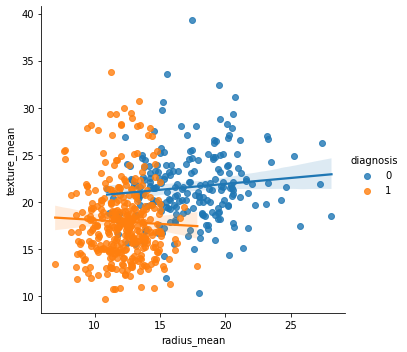

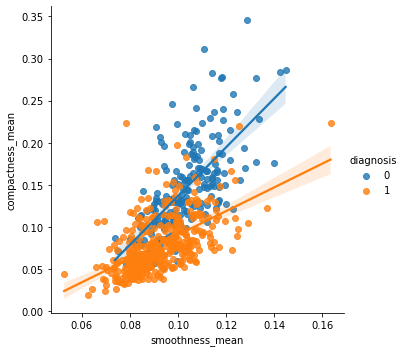

In [120]:
# 6. EDA
sns.lmplot(x = 'radius_mean', y = 'texture_mean', hue = 'diagnosis', data = data)
sns.lmplot(x ='smoothness_mean', y = 'compactness_mean', data = data, hue = 'diagnosis')

In [121]:
# 7. data feature dan data target
x = data.iloc[:, 1:]
y = data['diagnosis']

In [122]:
# 8. train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [123]:
# 9. membuat model
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [124]:
# 10. model prediksi
y_pred = knn.predict(x_test)

In [127]:
# 11. akurasi model prediksi
print(accuracy_score(y_test, y_pred))

0.9298245614035088


In [125]:
# 12. cross validation
neighbors = []
cv_scores = []
  
from sklearn.model_selection import cross_val_score
# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, x_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())

Nilai neighbors yang optimal adalah  15 


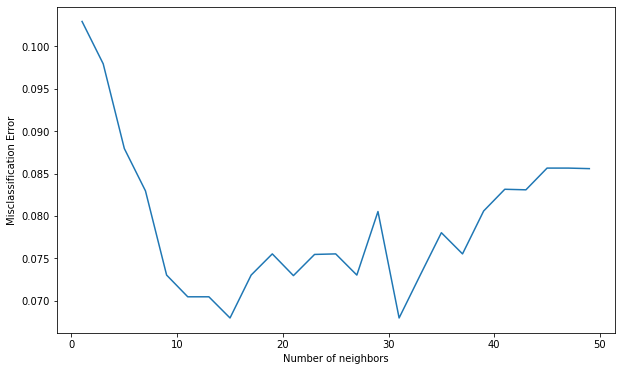

In [126]:
# 13. Missclasification
MSE = [1-x for x in cv_scores]
  
# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('Nilai neighbors yang optimal adalah % d ' % optimal_k)
  
# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()